In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [17]:
df.shape

(400, 3)

In [18]:
#df.sort_values('Age',ascending=True)

# Train test split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test=train_test_split(df.drop('Purchased',axis=1),
                                                  df.Purchased,test_size=0.3,random_state=4)

In [20]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [21]:
y_train.shape,y_test.shape

((280,), (120,))

# standard scalar

In [22]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
#scalar.fit(X_train)
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [23]:
scalar.mean_

array([3.78464286e+01, 7.07035714e+04])

In [24]:
y_train

33     0
195    0
286    0
221    1
239    1
      ..
360    1
385    1
197    0
174    0
122    0
Name: Purchased, Length: 280, dtype: int64

In [27]:
#check after scaled value
X_train_scaled

array([[-0.94662201, -0.78624689],
       [-0.36979032, -0.8156904 ],
       [-0.08137447, -0.2562637 ],
       [-0.2736517 ,  0.59759811],
       [ 1.45684338,  2.12866066],
       [-1.13889924,  0.303163  ],
       [ 0.11090276,  0.0087279 ],
       [ 0.01476414, -0.28570721],
       [ 0.39931861,  0.5681546 ],
       [ 0.88001168, -1.08068199],
       [ 0.30317999, -0.5506988 ],
       [-1.23503786,  0.24427598],
       [ 1.93753645, -0.69791635],
       [-0.56206755,  1.89311257],
       [-0.2736517 , -0.60958582],
       [-0.08137447,  2.21699119],
       [-0.65820616, -0.37403774],
       [-0.56206755,  0.8625897 ],
       [-0.08137447, -0.5506988 ],
       [-0.94662201, -0.99235146],
       [ 2.12981369, -1.08068199],
       [ 0.9761503 ,  2.06977363],
       [ 0.30317999,  0.27371949],
       [ 0.39931861, -0.49181178],
       [ 1.36070476, -1.46344763],
       [ 0.39931861,  0.12650194],
       [-0.75434478,  1.06869428],
       [ 0.88001168, -1.34567359],
       [-1.42731509,

In [30]:
#convert dataframe
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [31]:
# before stastistic data X_train
np.round(X_train.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,70704.0
std,10.0,34024.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,71000.0
75%,46.0,89000.0
max,60.0,150000.0


In [32]:
# after stastistic data X_train
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,-0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


# Effect of Scaling

Text(0.5, 1.0, 'after scaling')

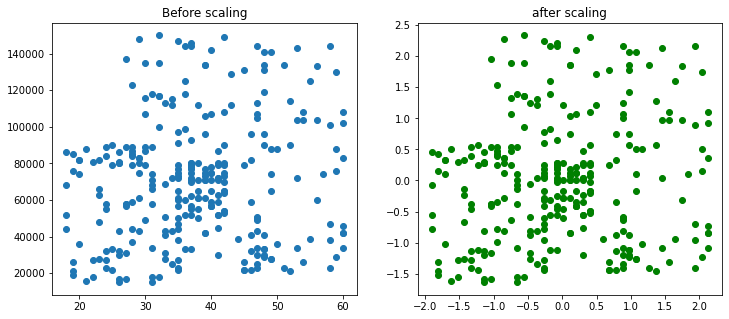

In [33]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='g')
ax2.set_title('after scaling')

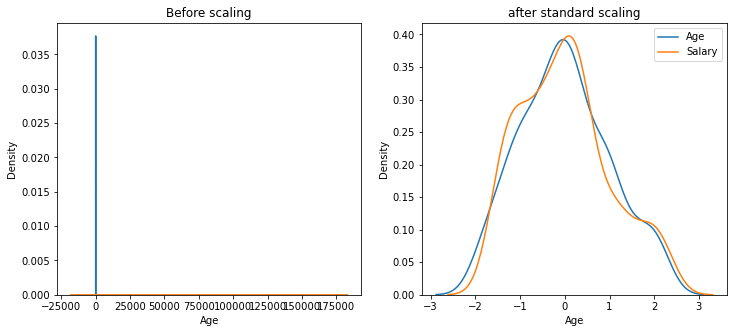

In [36]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)


ax2.set_title('after standard scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.legend(['Age','Salary'])
plt.show()

# Comparism and distribution

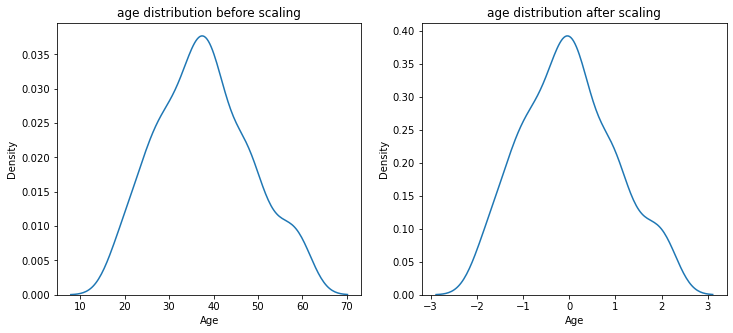

In [17]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title('age distribution before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)

#after scaling
ax2.set_title('age distribution after scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

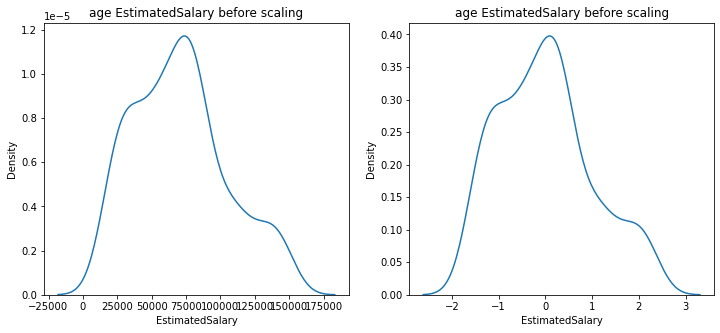

In [18]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title('age EstimatedSalary before scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling
ax2.set_title('age EstimatedSalary before scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

# why Scaling is important?

In [19]:
from sklearn.linear_model import LogisticRegression


In [20]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [21]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [22]:
#prediction
y_pred=lr.predict(X_test)

# feature scaling prediction
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [23]:
# ckeck accuracy
from sklearn.metrics import accuracy_score

In [24]:
print('Actula accuracy',accuracy_score(y_pred,y_test))
print('Scaled accuracy',accuracy_score(y_pred_scaled,y_test))

Actula accuracy 0.675
Scaled accuracy 0.8916666666666667


In [25]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree_scaled=DecisionTreeClassifier()

In [26]:
tree.fit(X_train, y_train)
tree_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [27]:
#prediction
y_pred=tree.predict(X_test)

# feature scaling prediction
y_pred_scaled=tree_scaled.predict(X_test_scaled)

In [28]:
print('Actula accuracy',accuracy_score(y_pred,y_test))
print('Scaled accuracy',accuracy_score(y_pred_scaled,y_test))

Actula accuracy 0.8833333333333333
Scaled accuracy 0.825


In [29]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [30]:
# add the outlier

In [31]:
df=df.append(pd.DataFrame({'Age':[5,90,95]}))

In [32]:
df

,Age,EstimatedSalary,Purchased
0,19,19000.0,0.0
1,35,20000.0,0.0
2,26,43000.0,0.0
3,27,57000.0,0.0
4,19,76000.0,0.0
...,...,...,...
398,36,33000.0,0.0
399,49,36000.0,1.0
0,5,NaN,NaN
1,90,NaN,NaN
